In [1]:
SEED=42

In [2]:

from functions import preprocess_titanic, preprocess_iris
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA, FastICA
import matplotlib.pyplot as plt
from sklearn import random_projection
from sklearn.metrics import mean_squared_error
from sklearn.manifold import Isomap

In [3]:
def dm_pca(x, n_components):
    pca = PCA(n_components=n_components, random_state=SEED)
    res = pca.fit_transform(x)
    return res, pca

def dm_ica(x, n_components):
    ica = FastICA(n_components=n_components, random_state=SEED)
    res = ica.fit_transform(x)
    return res, ica

def dm_rp(x, n_components):
    rp = random_projection.GaussianRandomProjection(n_components=n_components, random_state=SEED, compute_inverse_components=True)
    res = rp.fit_transform(x)
    return res, rp

def dm_isomap(x, n_components, n_neighbors):
    isomap = Isomap(n_components=n_components, n_neighbors=n_neighbors)
    res = isomap.fit_transform(x)
    return res, isomap

# Iris

In [34]:
X_train, X_test, y_train, y_test, labels = preprocess_iris(normalized=True)

In [35]:
# PCA

In [36]:
n_dims = [x for x in range(1,len(X_train[0]))]

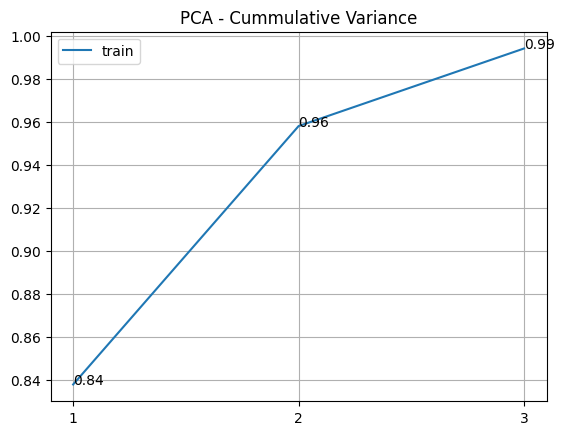

In [7]:
# we want to maximize variance

metrics_train = []
for i in n_dims:
    _, pca = dm_pca(X_train, i)
    metrics_train.append(np.sum(pca.explained_variance_ratio_))

plt.plot(n_dims, metrics_train, label="train")
for i, v in zip(n_dims, metrics_train):
    plt.annotate("%.2f" % v, (i,v))
plt.grid()
plt.xticks(n_dims)
plt.title("PCA - Cummulative Variance")
plt.legend()
plt.show()

In [8]:
from scipy.stats import kurtosis # yes, i will learn about kurtosis :)

In [9]:
### things i stole that make sense to me
### https://github.com/akcarsten/Independent_Component_Analysis
def kurt(x):
    n = np.shape(x)[0]
    mean = np.sum((x**1)/n) # Calculate the mean
    var = np.sum((x-mean)**2)/n # Calculate the variance
    skew = np.sum((x-mean)**3)/n # Calculate the skewness
    kurt = np.sum((x-mean)**4)/n # Calculate the kurtosis
    kurt = kurt/(var**2)-3

    return kurt, skew, var, mean

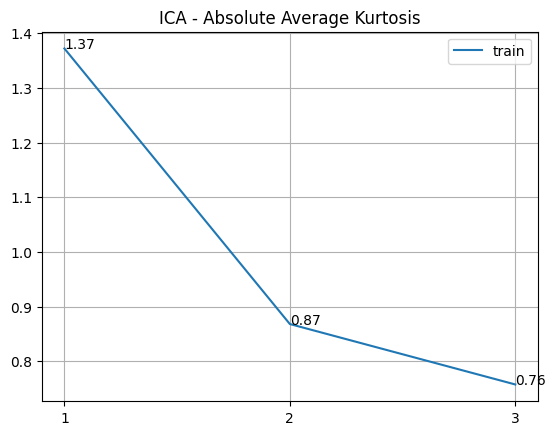

In [10]:
### ICA goal is to maximize non-Gaussianity in relation to kurtosis the lower the better
metrics_train = []
for i in n_dims:
    res, _ = dm_ica(X_train, i)
    metrics_train.append(np.mean(np.abs(kurtosis(res))))

plt.plot(n_dims, metrics_train, label="train")
for i, v in zip(n_dims, metrics_train):
    plt.annotate("%.2f" % v, (i,v))
plt.grid()
plt.xticks(n_dims)
plt.title("ICA - Absolute Average Kurtosis")
plt.legend()
plt.show()

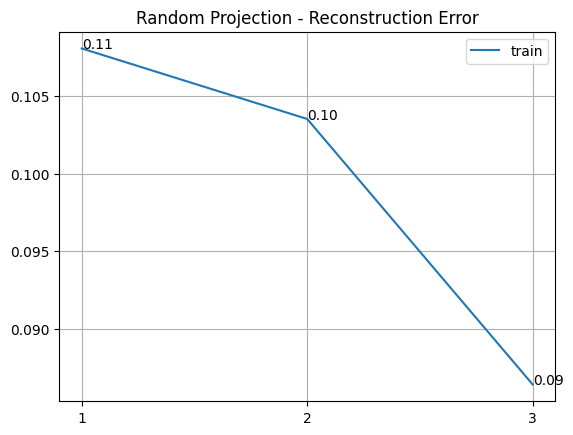

In [11]:
### RP/RCA
### Reconstruction error - MSE from original data and inverse_transform

metrics_train = []
for i in n_dims:
    res, transformer = dm_rp(X_train, i)
    inverse = transformer.inverse_components_
    x_inverse = np.matmul(res, inverse.T)
    metrics_train.append(mean_squared_error(X_train, x_inverse))

plt.plot(n_dims, metrics_train, label="train")
for i, v in zip(n_dims, metrics_train):
    plt.annotate("%.2f" % v, (i,v))
plt.grid()
plt.xticks(n_dims)
plt.title("Random Projection - Reconstruction Error")
plt.legend()
plt.show()

/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing th

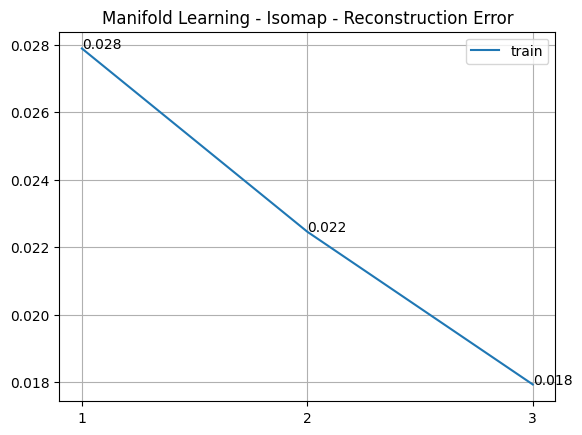

In [37]:
### Manifold Learning - Isomap
### Reconstruction error
metrics_train = []
for i in n_dims:
    res, transformer = dm_isomap(X_train, i, 8)
    metrics_train.append(transformer.reconstruction_error())

plt.plot(n_dims, metrics_train, label="train")
for i, v in zip(n_dims, metrics_train):
    plt.annotate("%.3f" % v, (i,v))
plt.grid()
plt.xticks(n_dims)
plt.title("Manifold Learning - Isomap - Reconstruction Error")
plt.legend()
plt.show()

# Titanic

In [29]:
X_train, X_test, y_train, y_test, labels = preprocess_titanic(normalized=True)

In [14]:
# PCA

In [31]:
n_dims = [x for x in range(1,len(X_train[0]))]

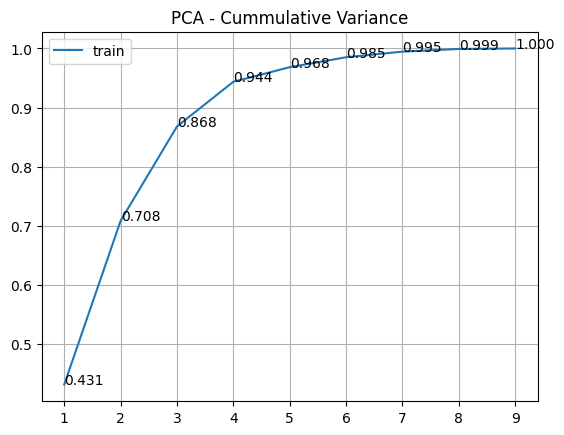

In [32]:
# we want to maximize variance

metrics_train = []
for i in n_dims:
    _, pca = dm_pca(X_train, i)
    metrics_train.append(np.sum(pca.explained_variance_ratio_))

plt.plot(n_dims, metrics_train, label="train")
for i, v in zip(n_dims, metrics_train):
    plt.annotate("%.3f" % v, (i,v))
plt.grid()
plt.xticks(n_dims)
plt.title("PCA - Cummulative Variance")
plt.legend()
plt.show()

In [17]:
from scipy.stats import kurtosis # yes, i will learn about kurtosis :)

In [18]:
### things i stole that make sense to me
### https://github.com/akcarsten/Independent_Component_Analysis
def kurt(x):
    n = np.shape(x)[0]
    mean = np.sum((x**1)/n) # Calculate the mean
    var = np.sum((x-mean)**2)/n # Calculate the variance
    skew = np.sum((x-mean)**3)/n # Calculate the skewness
    kurt = np.sum((x-mean)**4)/n # Calculate the kurtosis
    kurt = kurt/(var**2)-3

    return kurt, skew, var, mean

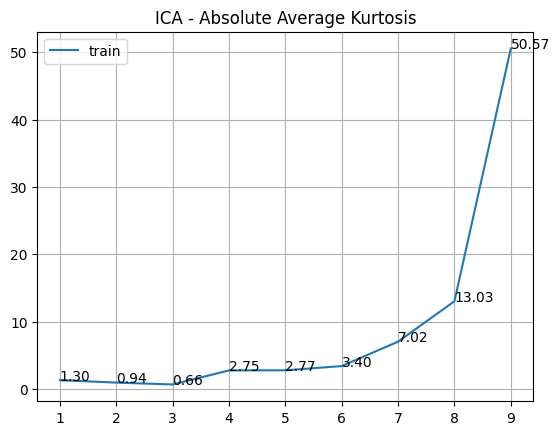

In [19]:
### ICA goal is to maximize non-Gaussianity in relation to kurtosis the lower the better
metrics_train = []
for i in n_dims:
    res, _ = dm_ica(X_train, i)
    metrics_train.append(np.mean(np.abs(kurtosis(res))))

plt.plot(n_dims, metrics_train, label="train")
for i, v in zip(n_dims, metrics_train):
    plt.annotate("%.2f" % v, (i,v))
plt.grid()
plt.xticks(n_dims)
plt.title("ICA - Absolute Average Kurtosis")
plt.legend()
plt.show()

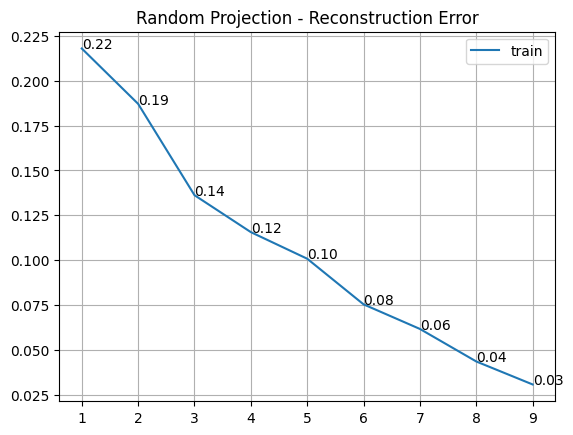

In [20]:
### RP/RCA
### Reconstruction error - MSE from original data and inverse_transform

metrics_train = []
for i in n_dims:
    res, transformer = dm_rp(X_train, i)
    inverse = transformer.inverse_components_
    x_inverse = np.matmul(res, inverse.T)
    metrics_train.append(mean_squared_error(X_train, x_inverse))

plt.plot(n_dims, metrics_train, label="train")
for i, v in zip(n_dims, metrics_train):
    plt.annotate("%.2f" % v, (i,v))
plt.grid()
plt.xticks(n_dims)
plt.title("Random Projection - Reconstruction Error")
plt.legend()
plt.show()

/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 9 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_ma

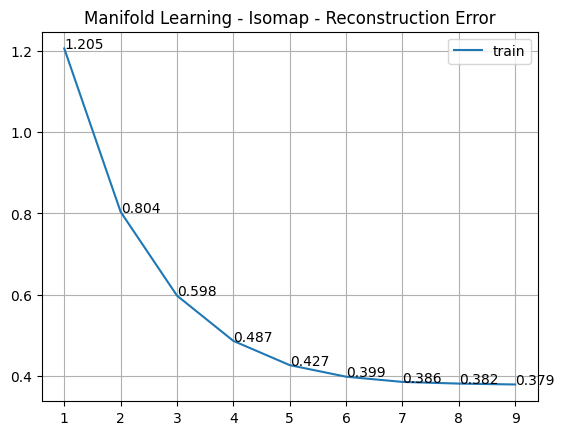

In [33]:
### Manifold Learning - Isomap
### Reconstruction error
### k = 29 for titanic train 12 titanic test
metrics_train = []
for i in n_dims:
    res, transformer = dm_isomap(X_train, i, 8)
    metrics_train.append(transformer.reconstruction_error())

plt.plot(n_dims, metrics_train, label="train")
for i, v in zip(n_dims, metrics_train):
    plt.annotate("%.3f" % v, (i,v))
plt.grid()
plt.xticks(n_dims)
plt.title("Manifold Learning - Isomap - Reconstruction Error")
plt.legend()
plt.show()